## Prueba de  Modelos supervisados
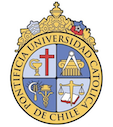

#### Pontificia Universidad Católica de Chile
Diplomado en Data Science

Septiembre 2021


### Nombre:
Pablo Opazo 
Mario Guajardo


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (`2009_1perc.csv` y `2010_1perc.csv`) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

- La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

# 1.- Enliste todas las librerias que utilizará (0.5 puntos)
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [ ]:
!pip install pandas
!pip install numpy
!pip install missingno
!pip install matplotlib.pyplot


In [ ]:
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 2.- Importación y revisión de los datos (1 punto)

Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración *básica* de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [ ]:
df1 = pd.read_csv("2009_1perc.csv")
df2 = pd.read_csv("2010_1perc.csv")
df1.head()

In [ ]:
df_consolidado = df1.append(df2)
df_consolidado

# 3.- Preprocesamiento de datos (1 punto)
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [59]:
categorical = df_consolidado.select_dtypes(include='object')
df = pd.DataFrame()

for col in categorical.columns: 
    cat_length = categorical[col].unique()
    if (len(cat_length) >= 2 and len(cat_length) <= 99):
        df[col] = categorical[col]

df

## Codigo funcional
# categorical.columns.value_counts()

# column_list   = df_consolidado[['inout','trhsloc','typeofid','explnstp','othpers','arstmade','sumissue','offunif','officrid','frisked','searched','contrabn','adtlrept','pistol','riflshot','asltweap','knifcuti','machgun','othrweap','pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other','radio','ac_rept','ac_inves','rf_vcrim','rf_othsw','ac_proxm','rf_attir','cs_objcs','cs_descr','cs_casng','cs_lkout','rf_vcact','cs_cloth','cs_drgtr','ac_evasv','ac_assoc','cs_furtv','rf_rfcmp','ac_cgdir','rf_verbl','cs_vcrim','cs_bulge','cs_other','ac_incid','ac_time','rf_knowl','ac_stsnd','ac_other','sb_hdobj','sb_outln','sb_admis','sb_other','rf_furt','rf_bulg','offverb','offshld', 'sex','race','haircolr','eyecolor','build']]

# column_list[column_list.columns] = column_list[column_list.columns].astype('category')
# column_list
# column_list = ['inout','trhsloc','typeofid','explnstp','othpers','arstmade','sumissue','offunif','officrid','frisked','searched','contrabn','adtlrept','pistol','riflshot','asltweap','knifcuti','machgun','othrweap','pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other','radio','ac_rept','ac_inves','rf_vcrim','rf_othsw','ac_proxm','rf_attir','cs_objcs','cs_descr','cs_casng','cs_lkout','rf_vcact','cs_cloth','cs_drgtr','ac_evasv','ac_assoc','cs_furtv','rf_rfcmp','ac_cgdir','rf_verbl','cs_vcrim','cs_bulge','cs_other','ac_incid','ac_time','rf_knowl','ac_stsnd','ac_other','sb_hdobj','sb_outln','sb_admis','sb_other','rf_furt','rf_bulg','offverb','offshld', 'sex','race','haircolr','eyecolor','build']
# # df_categorical  = df_consolidado[['inout','trhsloc','typeofid','explnstp','othpers','arstmade','sumissue','offunif','officrid','frisked','searched','contrabn','adtlrept','pistol','riflshot','asltweap','knifcuti','machgun','othrweap','pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other','radio','ac_rept','ac_inves','rf_vcrim','rf_othsw','ac_proxm','rf_attir','cs_objcs','cs_descr','cs_casng','cs_lkout','rf_vcact','cs_cloth','cs_drgtr','ac_evasv','ac_assoc','cs_furtv','rf_rfcmp','ac_cgdir','rf_verbl','cs_vcrim','cs_bulge','cs_other','ac_incid','ac_time','rf_knowl','ac_stsnd','ac_other','sb_hdobj','sb_outln','sb_admis','sb_other','rf_furt','rf_bulg','offverb','offshld', 'sex','race','haircolr','eyecolor','build']]
# # df_categorical[df_categorical.columns] = df_categorical[df_categorical.columns].astype('category')
# # df_categorical
# df_prueba = pd.get_dummies(column_list, prefix='cat', columns= [column_list])

# df_prueba['cat_arstmade'].corr(df_prueba['cat_sex'])



,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm
0,A,O,U,P,Y,N,N,N,Y,N,...,B,BK,BR,M,L,BRONX,G,7,CM,1
1,A,O,S,P,Y,Y,N,N,N,N,...,A,BK,BR,T,L,QUEENS,J,U,CM,1
2,1,O,S,V,Y,N,N,N,N,N,...,Q,BR,BR,M,L,BRONX,E,U,CM,1
3,A,O,U,P,Y,N,N,N,Y,N,...,B,BK,BR,T,L,BROOKLYN,J,4,CM,1
4,A,O,U,P,Y,Y,N,N,Y,N,...,Q,BK,BR,M,L,QUEENS,H,U,CM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,1,O,U,P,Y,N,N,N,Y,N,...,B,BK,BR,T,L,BROOKLYN,I,U,CM,1
6009,A,O,S,R,Y,N,N,N,N,N,...,Z,BK,BR,M,L,BROOKLYN,A,U,CM,1
6010,A,O,U,P,Y,N,N,Y,Y,N,...,W,GY,Z,M,L,STATEN IS,E,U,CM,1
6011,1,O,S,P,Y,N,N,N,N,I,...,Q,BK,BR,M,L,QUEENS,E,U,CM,1


In [ ]:
# gráficos para ver datos vacíos
msno.bar(df_consolidado)

- 3.2 Reemplaze las siguientes clases faltantes:

  -Si alguna categoría de las columnas officrid,  o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'
  
  -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor
  
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [ ]:

df_consolidado['officrid'] = df_consolidado['officrid'].str.replace(' ','N', regex = True)
df_consolidado['offverb'] = df_consolidado['offverb'].str.replace(' ','N', regex = True)

df_consolidado['sector'] = df_consolidado['sector'].str.replace(' ','U', regex = True)
df_consolidado['trhsloc'] = df_consolidado['offshld'].str.replace(' ','U', regex = True)
df_consolidado['beat'] = df_consolidado['beat'].str.replace(' ','U', regex = True)


- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [ ]:
def transform(feet, inch):
    return (feet *  0.3048 + inch *0.0254)

df_consolidado['ht_feet.ht_inch'] = df_consolidado.apply(lambda x : transform( x['ht_feet'], x['ht_inch']), axis=1)
df_consolidado['ht_feet.ht_inch']

- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/ 

In [ ]:
df_consolidado['fecha'] = pd.to_datetime(df_consolidado['datestop'], format= '%m%d%Y')
df_consolidado['month'] = pd.DatetimeIndex(df_consolidado['fecha']).month
df_consolidado['month'].head()

 - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [ ]:
# agregarmos la columna arstmade, 'ht_feet.ht_inch', 'month' y 'year'  a nuestra lista
data_final = categorical_columns
data_final['arstmade'] = df_consolidado['arstmade']
data_final['ht_feet.ht_inch'] = df_consolidado['ht_feet.ht_inch']
data_final['month'] = df_consolidado['month']
data_final['year'] = df_consolidado['year']

# 4.- Análisis exploratorio (1 punto)

- 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [ ]:
data_final['arstmade']
plt.hist(data_final['arstmade'])

> RESPUESTA: Podemos ver que la variable está "cargada" hacia el evento negativo por lo que podemos deducir queen la mayor cantidad de los datos controlados no se realizó un arresto 

In [ ]:
data_final['arstmade'].dtypes()


- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

- 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

- 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. (0.5 puntos)

Los atributos que tienen el prefijo pf (`['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']`) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'. 

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

# 6.- Modelación (2 puntos)

- 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test  utilizando el año 2009 para entrenar, y el año 2010 para testear. (0.5 pts)

- 6.2  Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno). (1.5 pts)

# Bonus (0.5 pts)

¿Que puede hacer para mejorar la predicción de los modelos?